# TP K-Nearest Neighbors 

## Imports + générations des données

In [47]:
import tp_knn_source as source
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import cm
%matplotlib inline 
import seaborn as sns
from matplotlib import rc
import scipy

In [48]:
X1 = source.rand_gauss()
X2, y2 = source.rand_tri_gauss()
X3, y3 = source.rand_checkers()
X4, y4 = source.rand_clown()

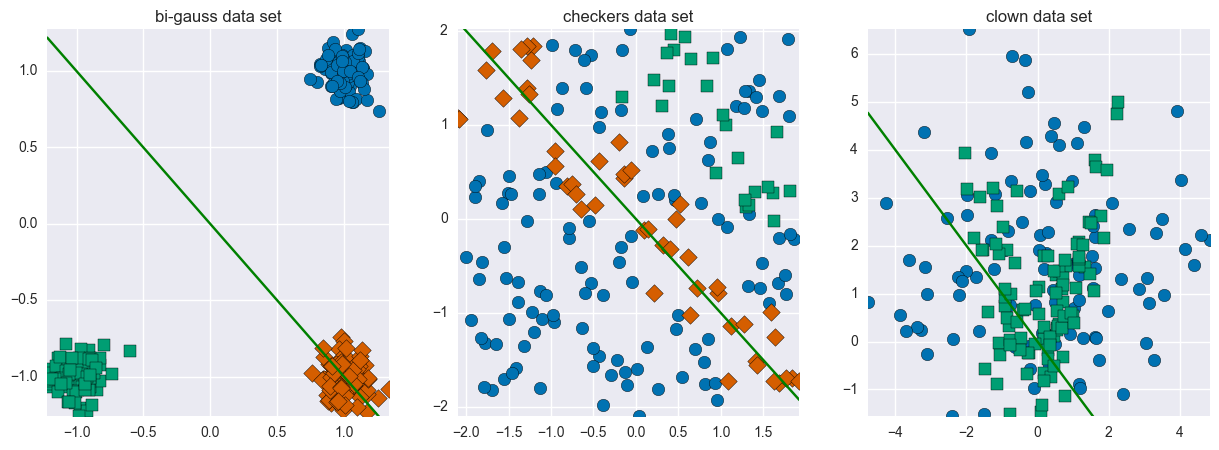

In [49]:
plt.close("all")
plt.figure(1, figsize=(15, 5))

plt.subplot(131)
plt.title('bi-gauss data set')
source.plot_2d(X2, y2, [0,1,1])

plt.subplot(132)
plt.title('checkers data set')
source.plot_2d(X3, y3, [0,1,1])

plt.subplot(133)
plt.title('clown data set')
source.plot_2d(X4, y4, [0,1,1])

plt.show()

## Approche Intuitive

### 1)
Pour chaque point x de test, on calcule la distance euclidienne parmi les points x d'apprentissage et on choisi le y correspondant. On aura ainsi une fonction continue par morceaux

## Approche Formelle

### 2) Complétion de la classe KNN Classifier

In [50]:
import sklearn.metrics.pairwise as pw 
from sklearn.base import BaseEstimator, ClassifierMixin

class KNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_ = X
        self.y_ = y
        return self

    def predict(self, X, metric):
        n_samples, n_features = X.shape
        # TODO : Compute all pairwise distances between X and self.X_
        D = pw.pairwise_distances(self.X_, X, metric=metric)
        
        pred = np.zeros(n_samples)
        for i in range(n_samples):
            k_closest = np.argsort(D[:,i])[:self.n_neighbors]
            pred[i] = scipy.stats.mode(self.y_[k_closest])[0][0]
        return pred #np.zeros(n_samples)
    
    def score(self, y):
        return np.sum(y==self.y_)*100/(len(self.y_))

In [51]:
knn = KNNClassifier(n_neighbors=1)
knn.fit(np.asarray(X2),y2)
print(knn.score(knn.predict(X2, 'euclidean')))

knn = KNNClassifier(n_neighbors=10)
knn.fit(X3,y3)
print(knn.score(knn.predict(X3, 'euclidean')))


100.0
91.6666666667


In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn2.fit(np.asarray(X2),y2)
print(knn2.predict(X1))


[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


### 3) 

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn2 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn2.fit(X2,y2)

knn3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn3.fit(X3,y3)

knn4 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn4.fit(X4,y4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### 4)

C:\Users\Mohamed\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


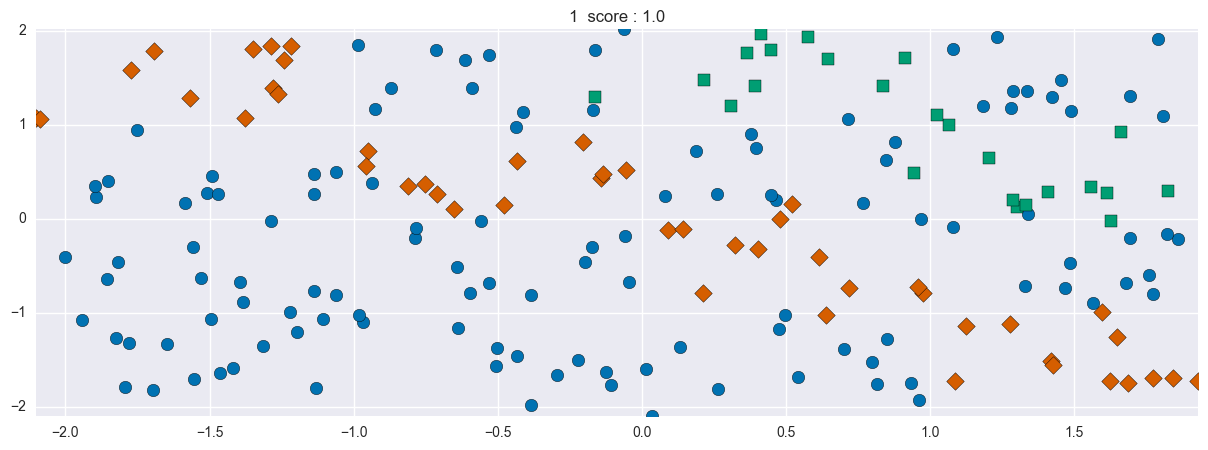

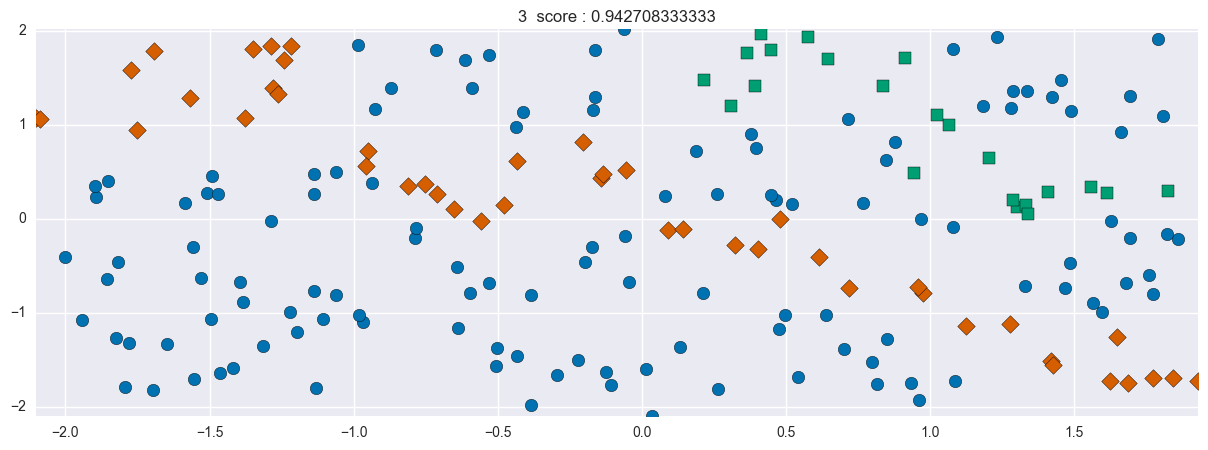

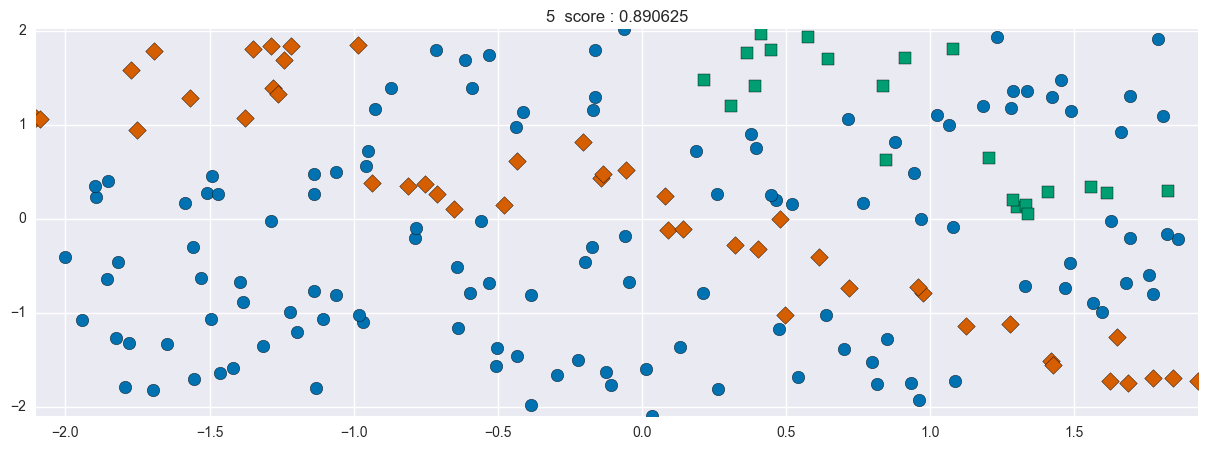

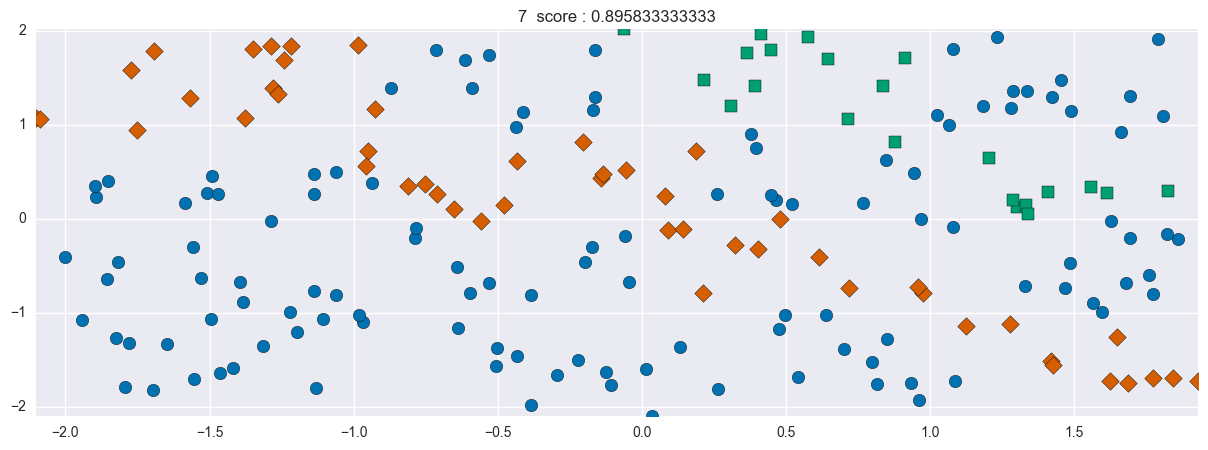

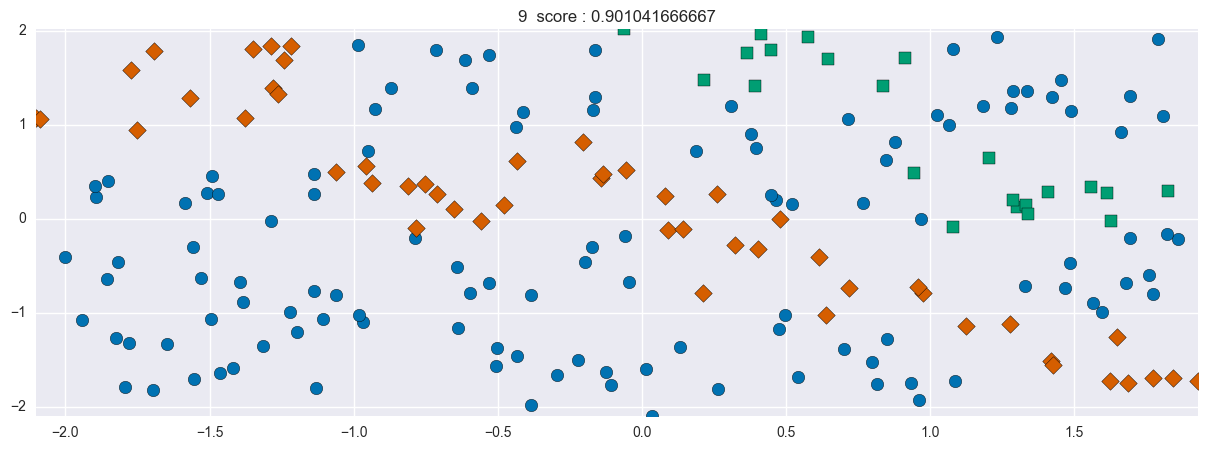

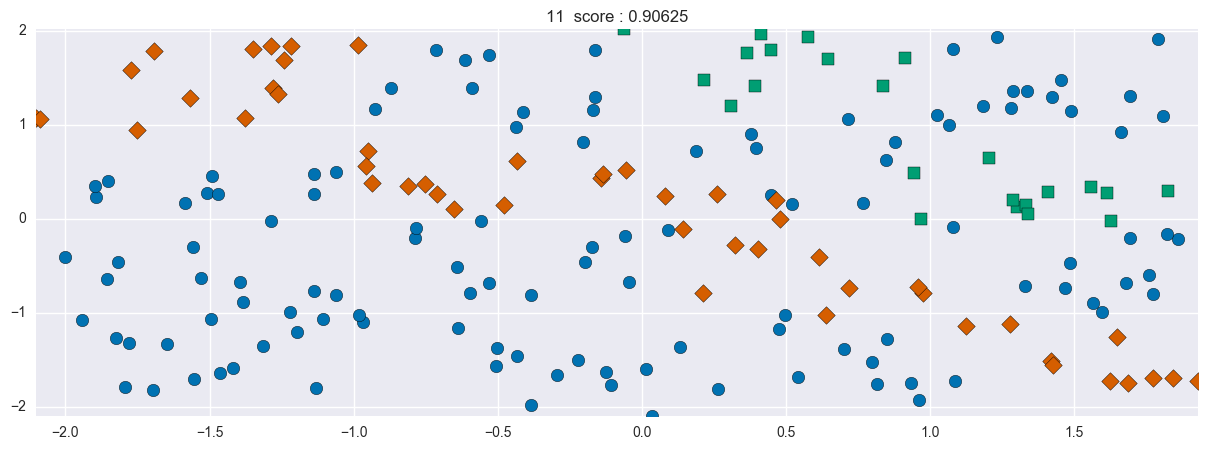

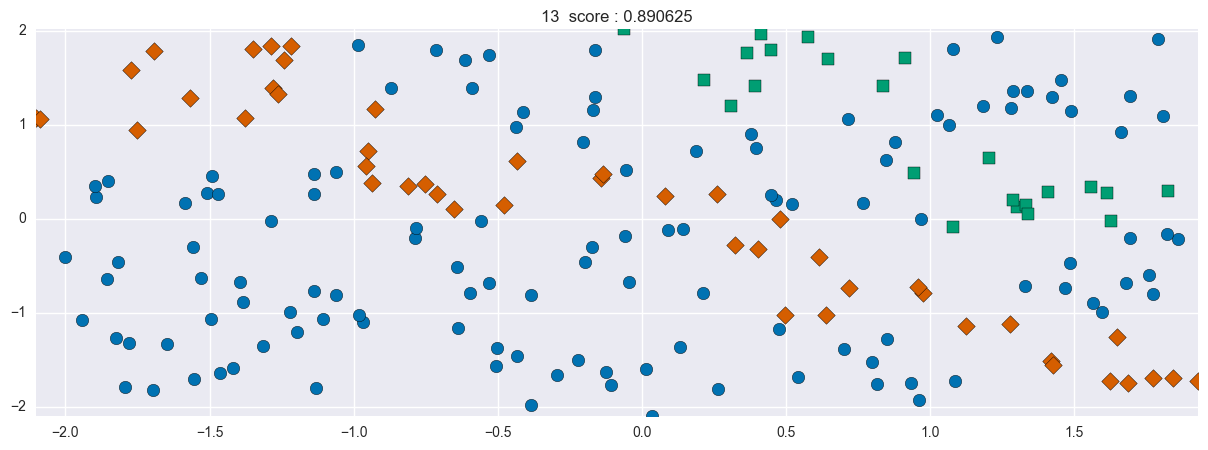

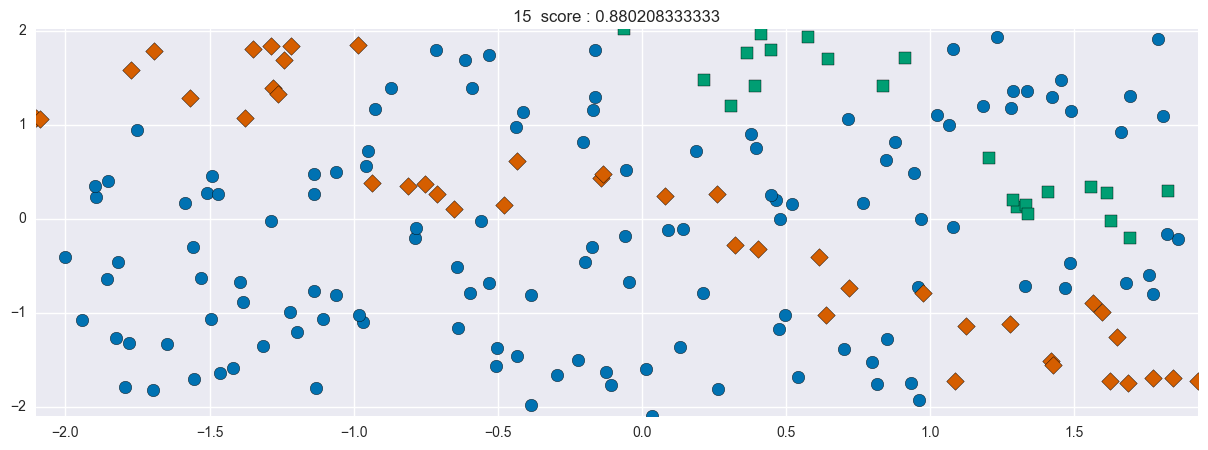

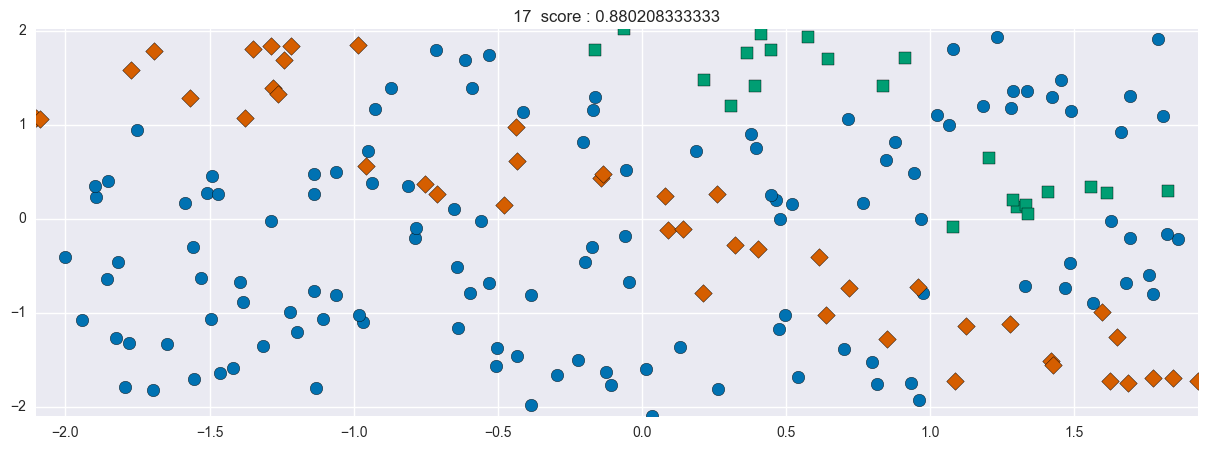

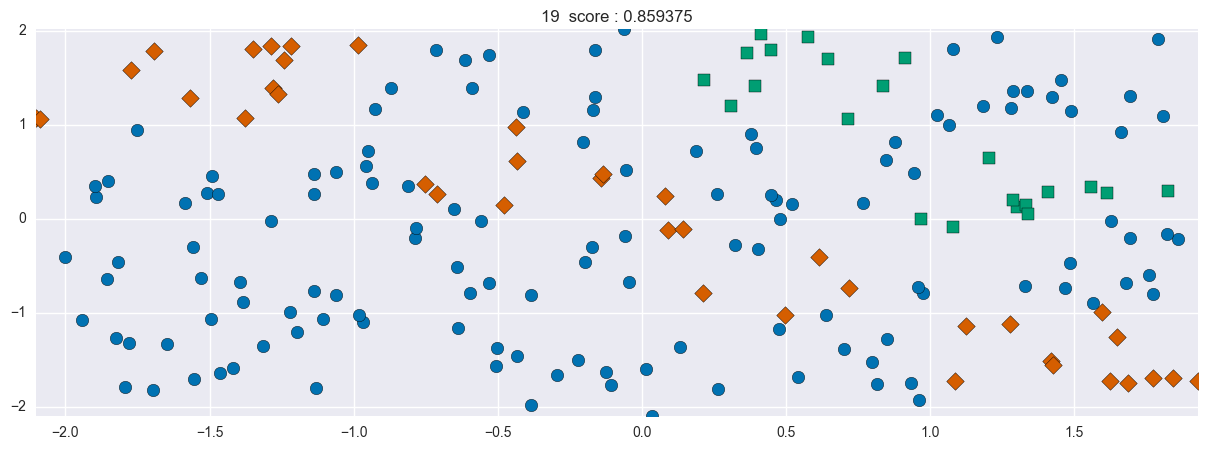

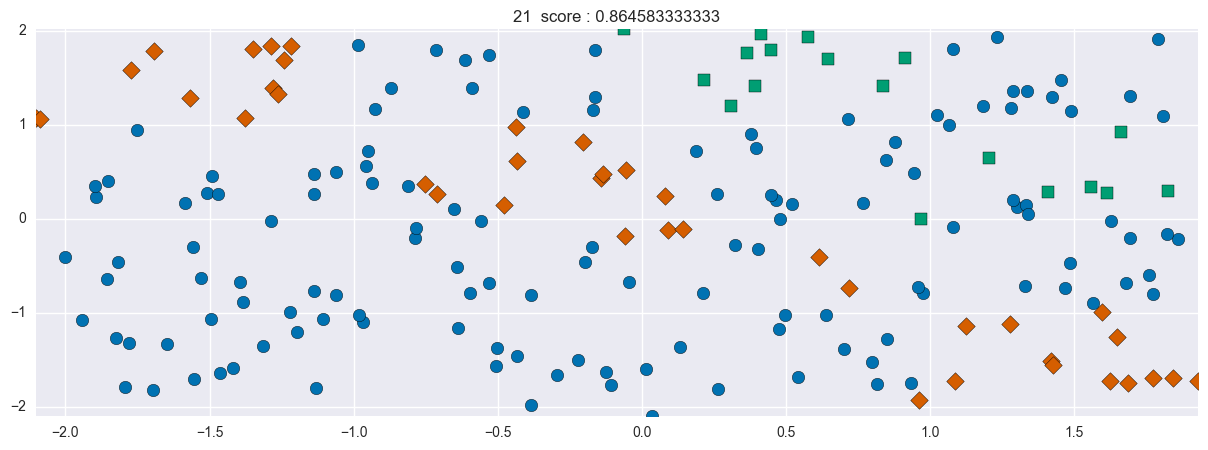

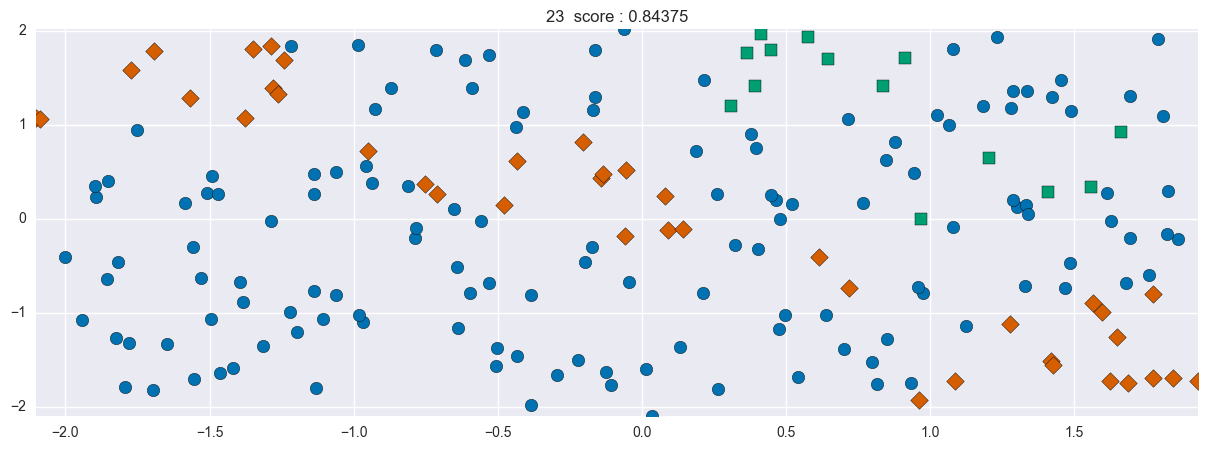

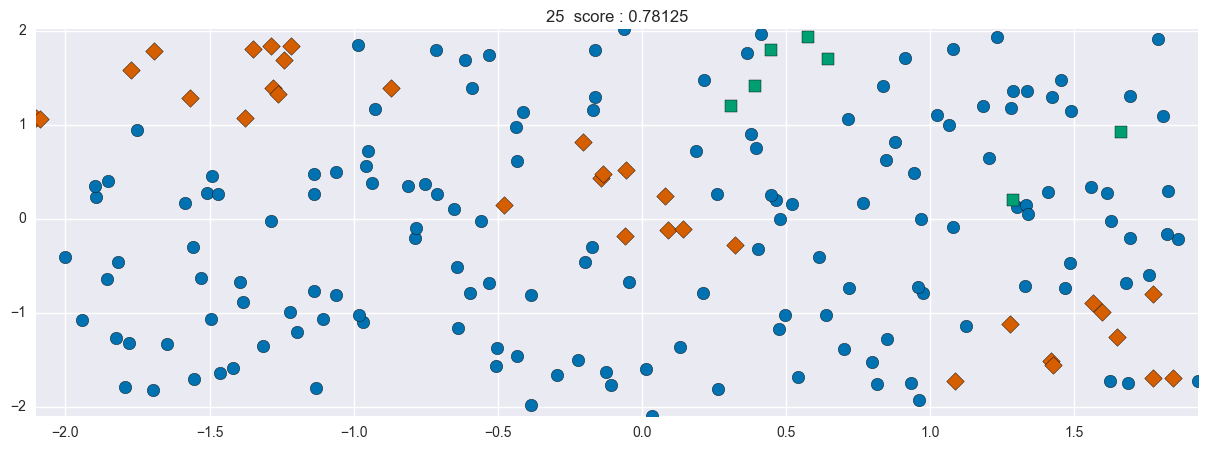

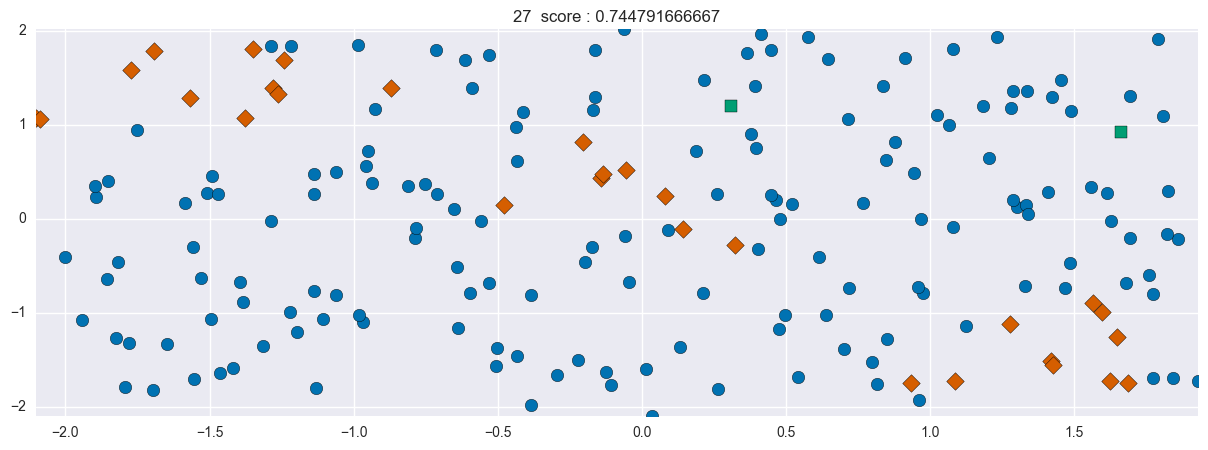

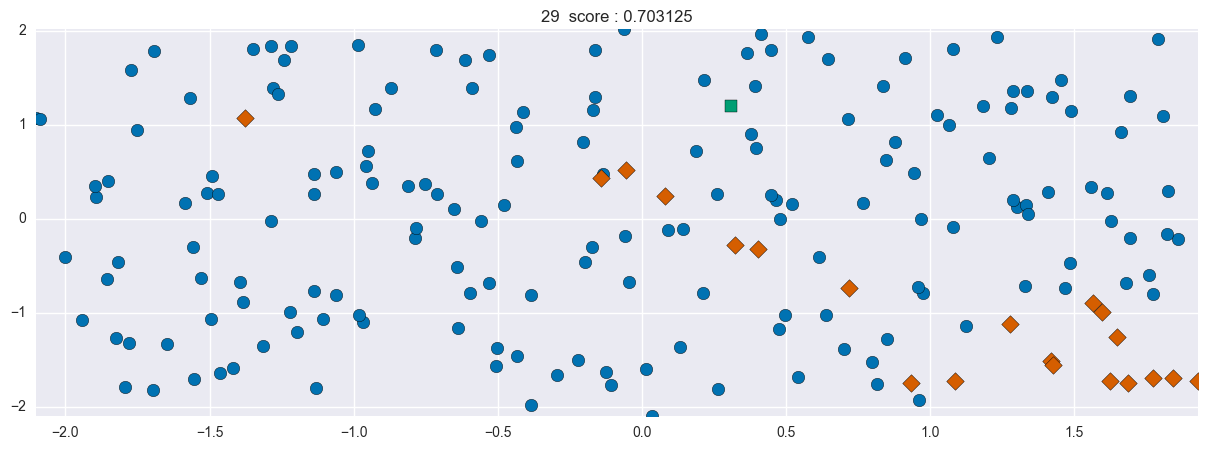

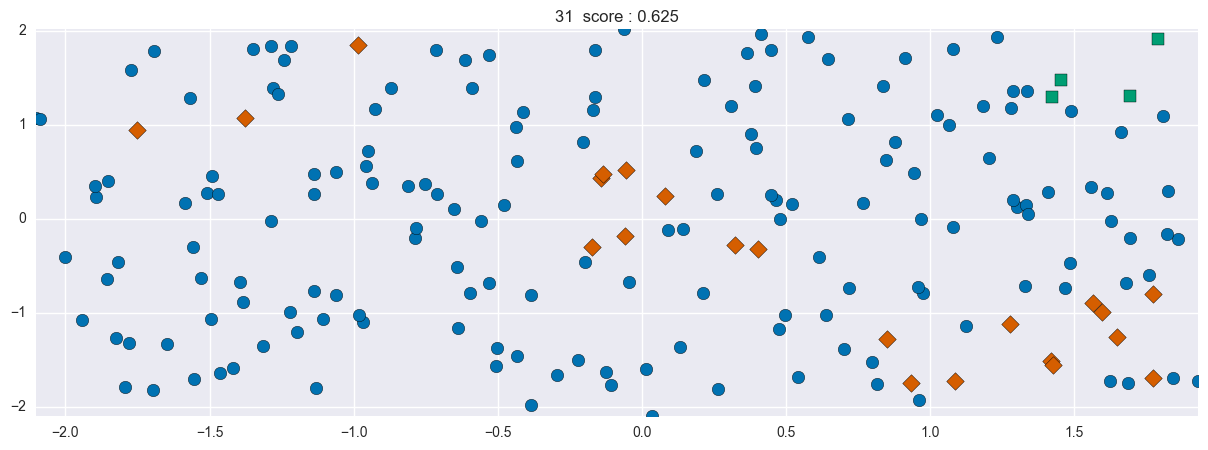

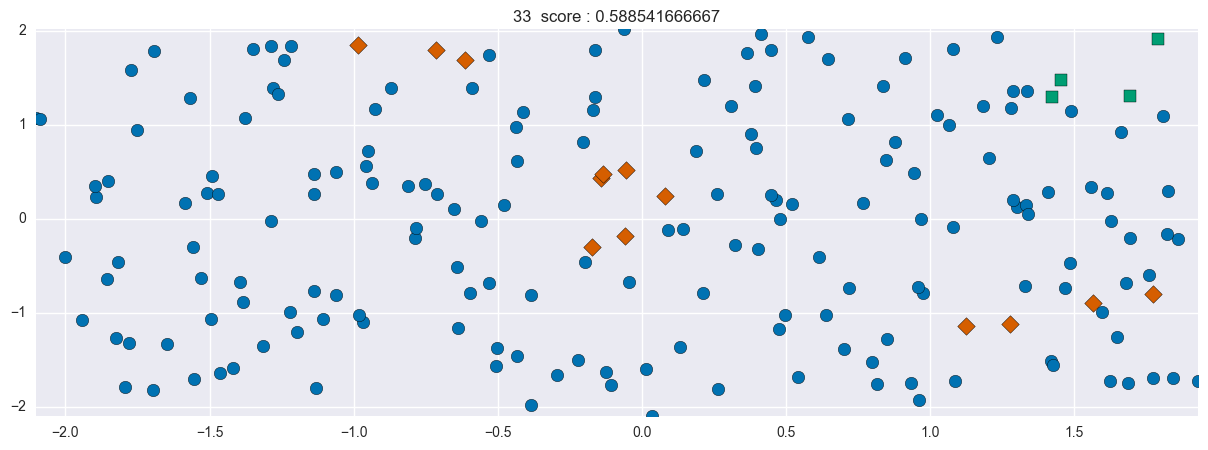

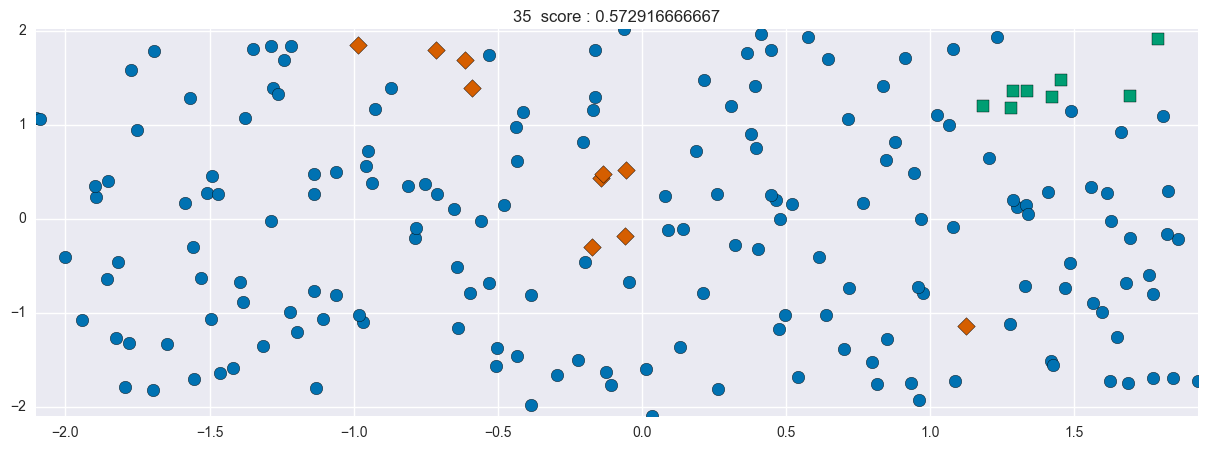

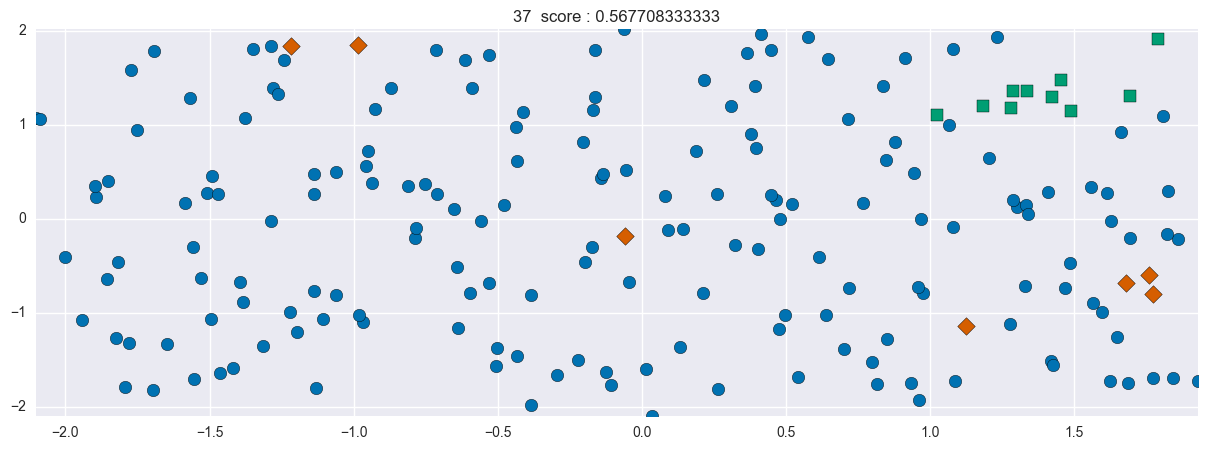

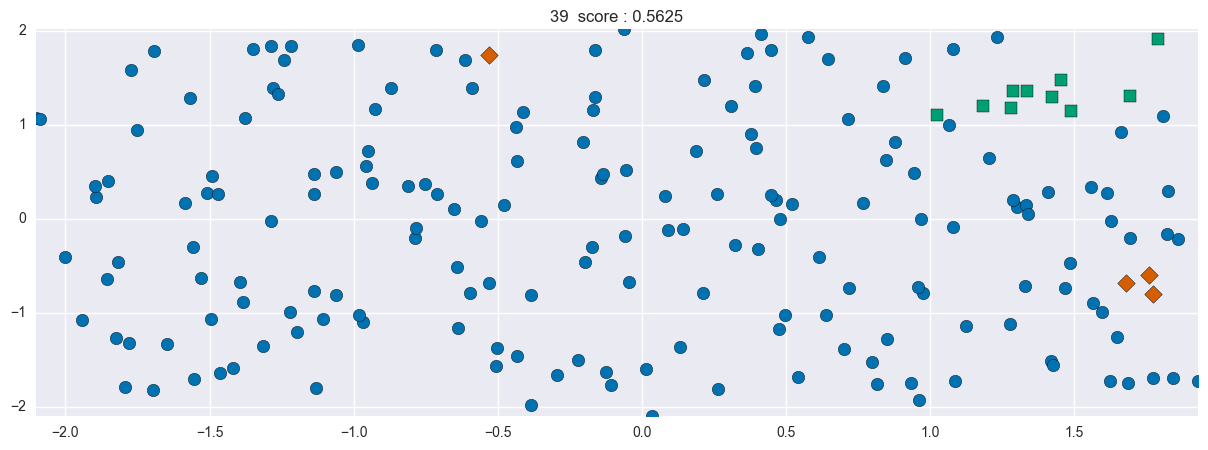

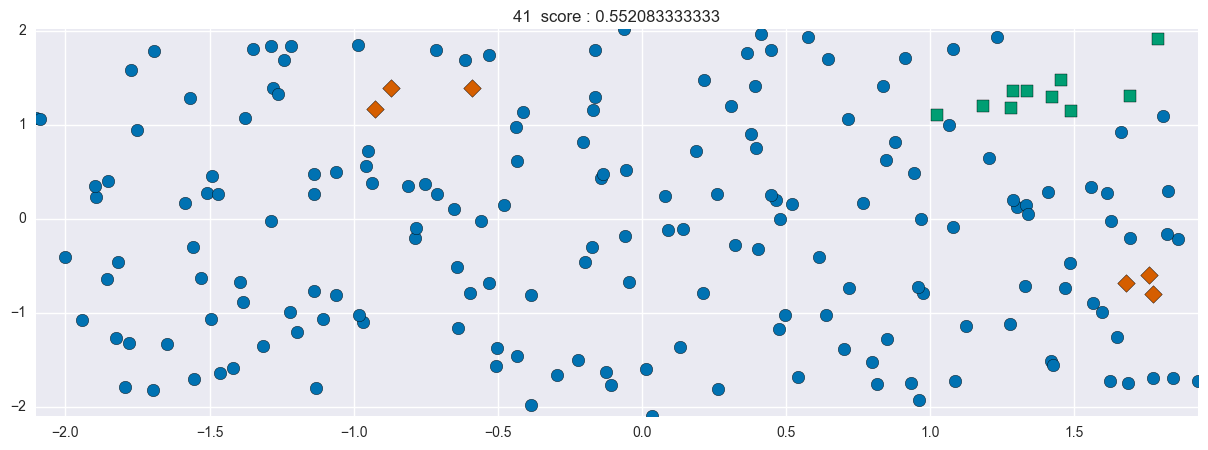

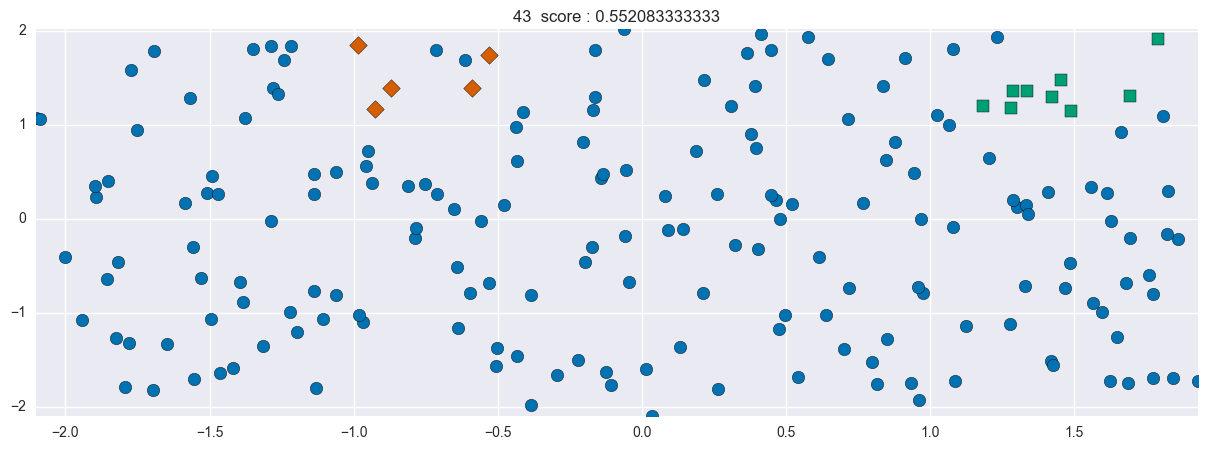

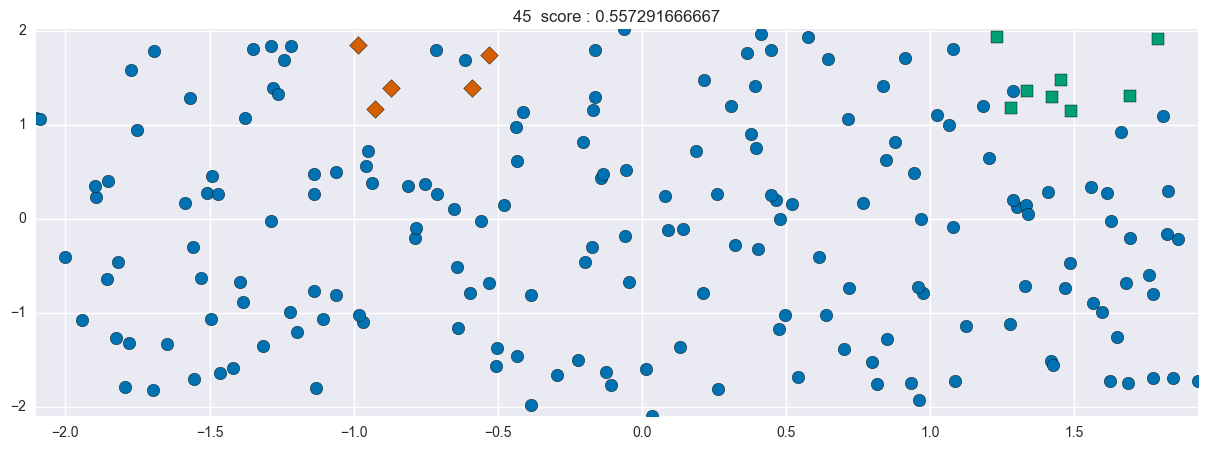

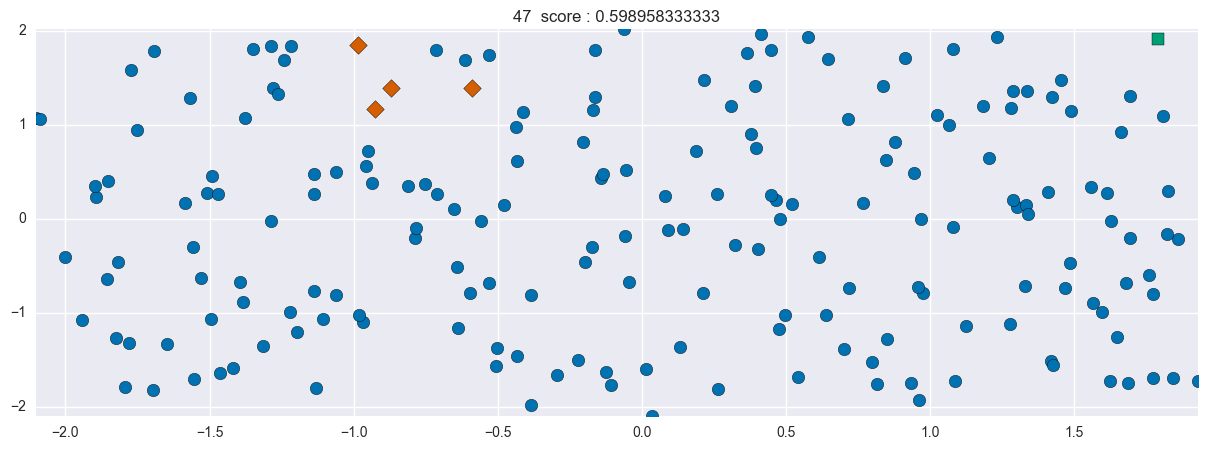

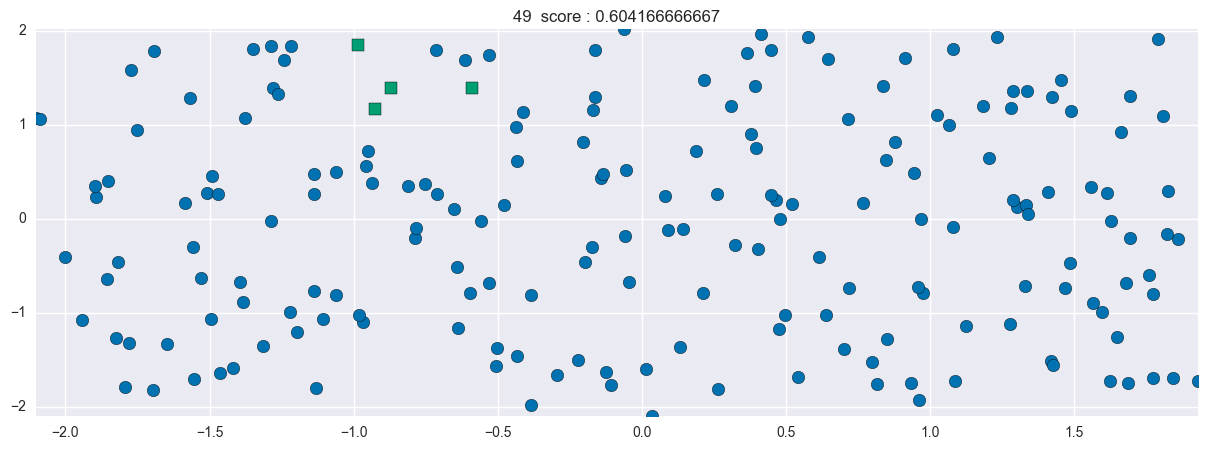

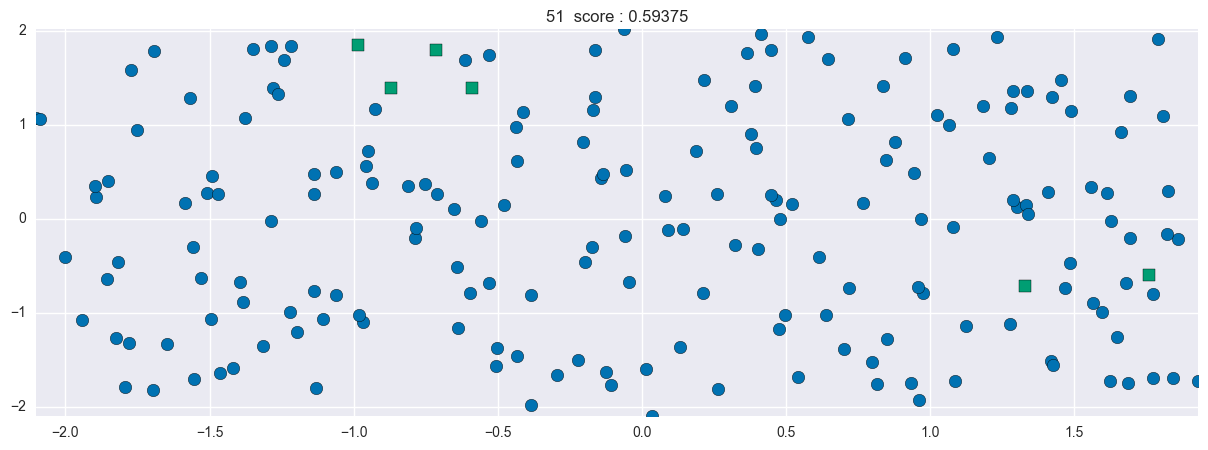

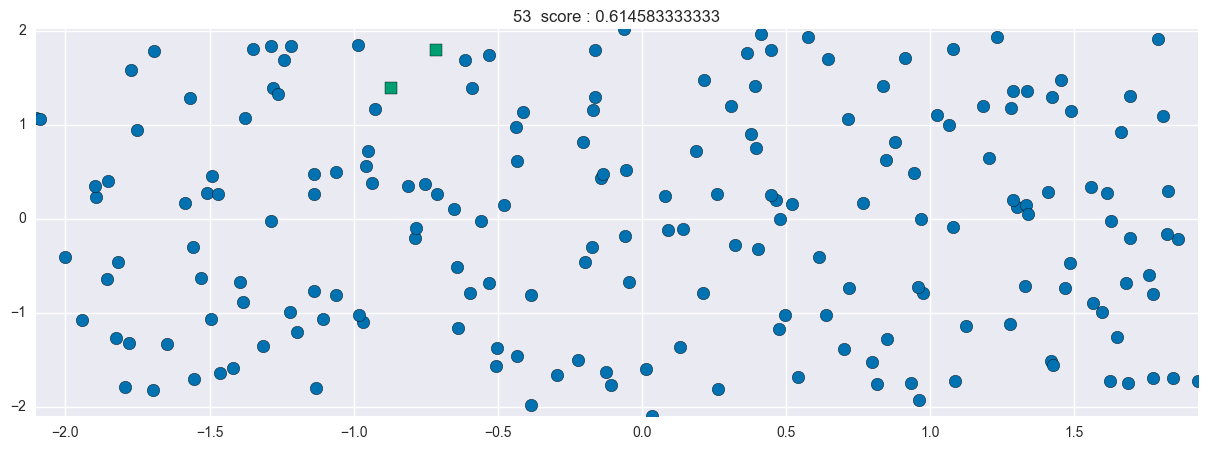

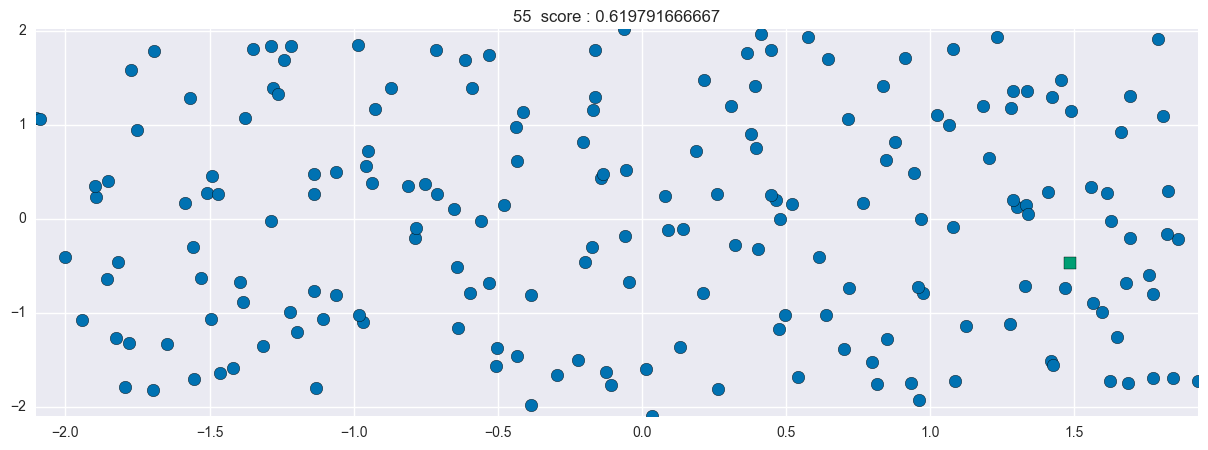

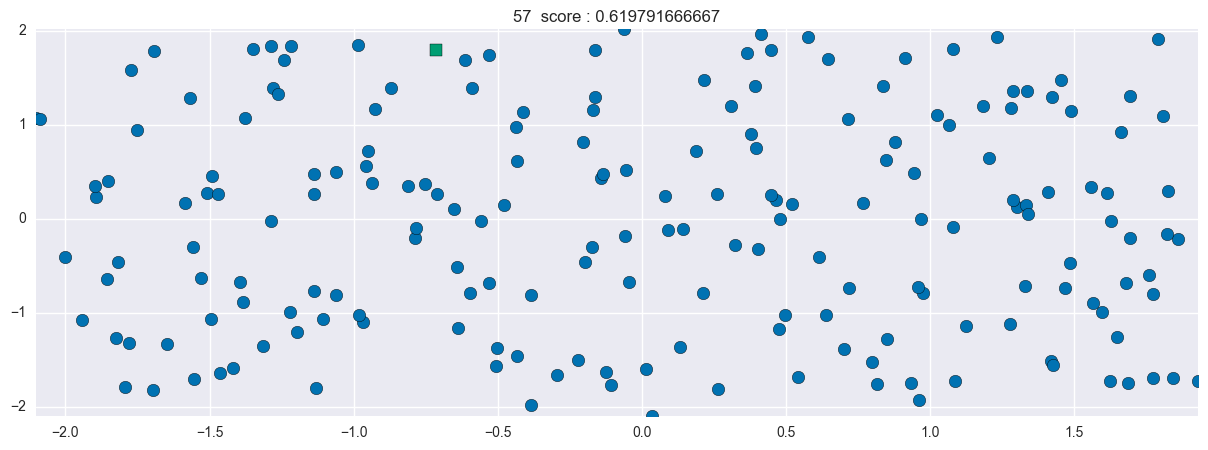

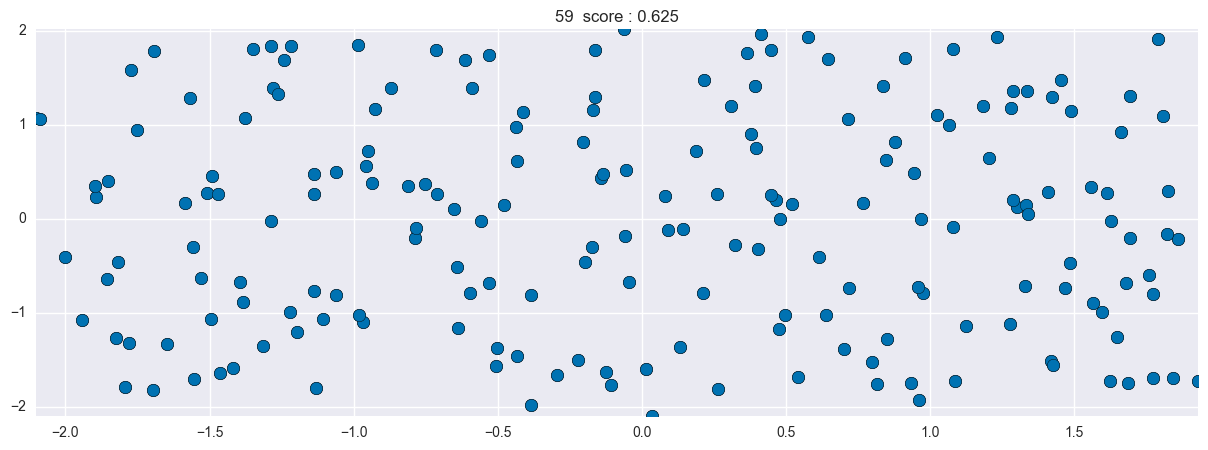

In [54]:
for k in range(1,60, 2):
    knn3 = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn3.fit(X3,y3)
    y3pred = knn3.predict(X3)
    #source.plot_2d(X3, y3)
    plt.figure(k, figsize=(15, 5))
    source.plot_2d(X3, y3pred)
    plt.title(str(k)+"  score : "+str(knn3.score(X3,y3)))

source.plot_2d(X3, y3pred)


### 5)

In [55]:
import sklearn.metrics.pairwise as pw 
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.extmath import weighted_mode

class KNNClassifierPond(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors=1, metric='euclidean', h=0.01):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.h = h

    def fit(self, X, y):
        self.X_ = X
        self.y_ = y
        return self

    def predict(self, X):
        n_samples, n_features = X.shape
        # TODO : Compute all pairwise distances between X and self.X_
        D = pw.pairwise_distances(self.X_, X, metric=self.metric)
        pond = np.zeros([n_samples, self.n_neighbors])
        pred = np.zeros(n_samples)
        
        for i in range(n_samples):
            k_closest = np.argsort(D[i,:])[:self.n_neighbors]
            temp = (np.exp(-D[i,:]**2/self.h))
            pond[i] = temp[k_closest]
            
            pred[i] = weighted_mode(self.y_[k_closest], pond[i])[0][0]
        # TODO : Find the predicted labels y for each entry in X
        # You can use the scipy.stats.mode function

        return pred #np.zeros(n_samples)
    
    def score(self, y, ytrue):
        return np.sum(y==ytrue)*100/(len(ytrue))

    

### 6) Taux d'erreur sur le set d'apprentissage + test

codée nous même :
sur les données d'apprentissage :
100.0
sur les données test :
47.3958333333


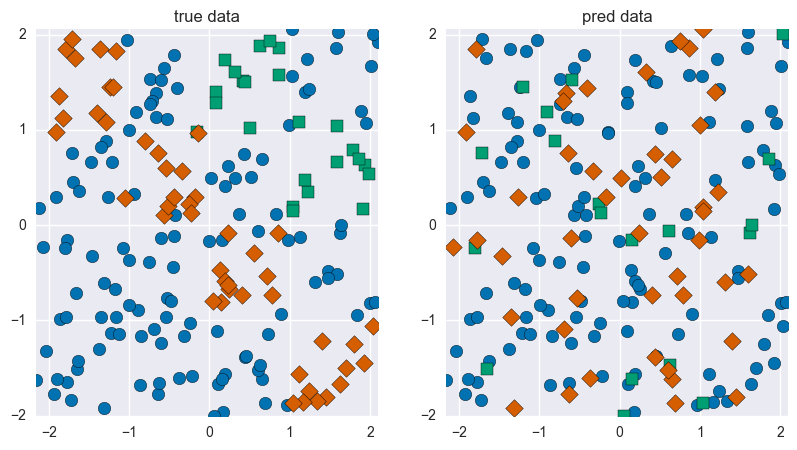

scikit learn : 
1.0
0.875


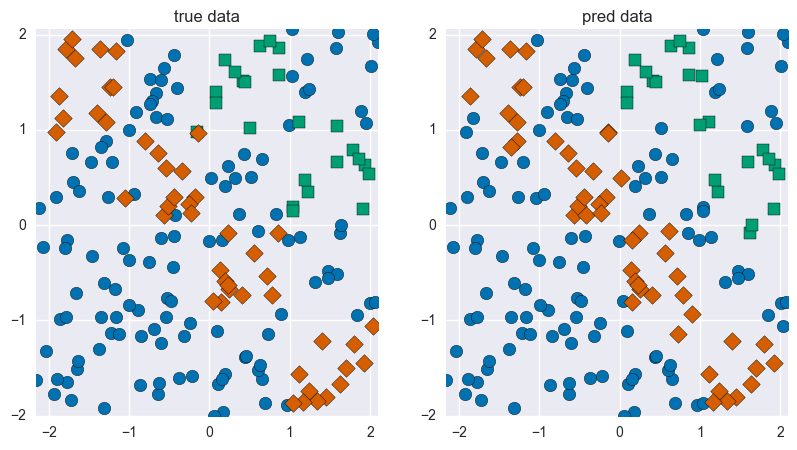

In [56]:
plt.ion()
knn3 = KNNClassifierPond(n_neighbors=1, h=0.01)
knn3.fit(X3,y3)
def f(x):
    return knn3.predict(x)
print("codée nous même :")
print("sur les données d'apprentissage :")
print(knn3.score(f(X3), y3))
print("sur les données test :")
X3test, y3test = source.rand_checkers()
print(knn3.score(f(X3test), y3test))
plt.figure(1, figsize=(15, 5))
plt.subplot(131)
source.plot_2d(X3test, y3test)
plt.title("true data")
plt.subplot(132)
source.plot_2d(X3test, f(X3test))
plt.title("pred data")
plt.show()

print("scikit learn : ")
knn3SL = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn3SL.fit(X3,y3)
y3pred = knn3SL.predict(X3)
print(knn3SL.score(X3,y3))
print(knn3SL.score(X3test, y3test))
plt.figure(2, figsize=(15, 5))
plt.subplot(131)
plt.title("true data")
source.plot_2d(X3test, y3test)
plt.subplot(132)
source.plot_2d(X3test, knn3SL.predict(X3test))
plt.title("pred data")
plt.show()

### 7) courbes en fonction du paramètre k pour n variant de 100, 500, 1000

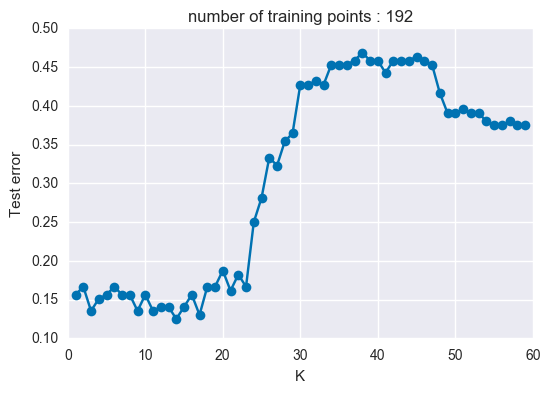

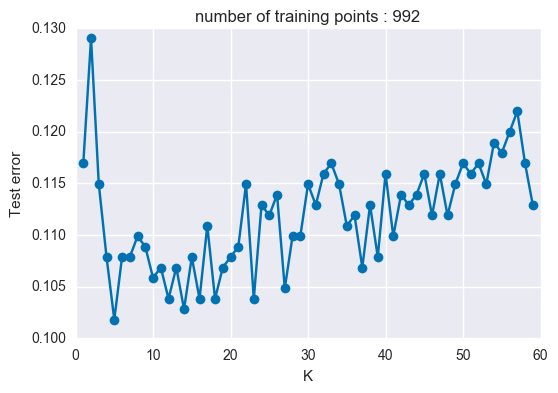

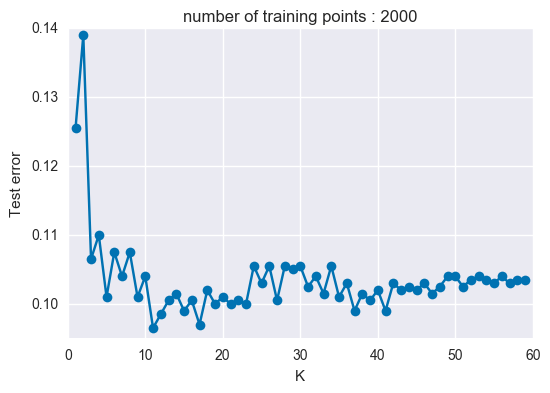

In [63]:
nx = [100, 500, 1000]

for n in nx: 
    EC = source.ErrorCurve(k_range=list(range(1,60)))
    n1 = n2 = n
    sigma = 0.1
    X4,y4 = source.rand_checkers(n1,  n2, sigma)
    X4test,y4test = source.rand_checkers(n1,  n2, sigma)

    plt.figure()
    EC.fit_curve(X4, y4, X4test, y4test)
    EC.plot()

### 8) Avantages vs inconvénients des KNN : 

#### Avantages : 
- Modèle théoriquement accessible
- Frontières irrégulières : OK

#### Inconvénients : 
- Prédiction lente, calcul de distance gourmand
- sensible au features non pertinents et corrélés

### 9) Application à des données réelles 


<class 'sklearn.datasets.base.Bunch'>
Score : 0.925472747497


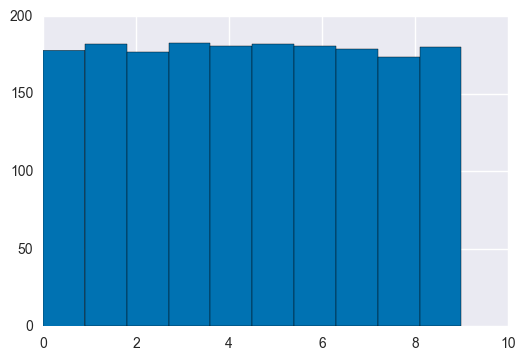

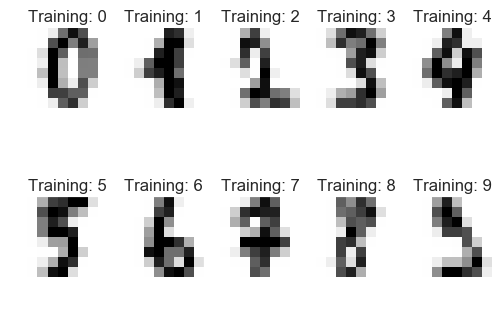

In [70]:
from sklearn import datasets
# The digits dataset
digits = datasets.load_digits()

print(type(digits))
# A Bunch is a subclass of 'dict' (dictionary)
# help(dict)
# see also "http://docs.python.org/2/library/stdtypes.html#mapping-types-dict"

plt.close(7)
plt.figure(7)
for index, (img, label) in enumerate(list(zip(digits.images, digits.target))[10:20]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='None')
    plt.title('Training: %i' % label)

plt.figure()
plt.hist(digits.target)

n_samples = len(digits.data)

X_train = digits.data[:n_samples // 2]
Y_train = digits.target[:n_samples // 2]
X_test = digits.data[n_samples // 2:]
Y_test = digits.target[n_samples // 2:]

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, Y_train)

score = knn.score(X_test, Y_test)
print('Score : %s' % score)



### 10) Estimation de la matrice de confusion 

Confusion matrix, without normalization
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 82  5  1  0  1  0  0  0  2]
 [ 1  0 79  6  0  0  0  0  0  0]
 [ 0  0  0 81  0  3  0  4  1  2]
 [ 2  0  0  0 87  0  0  2  1  0]
 [ 0  0  0  0  0 85  3  0  0  3]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  1  0  0  0  0 88  0  0]
 [ 0  6  1  6  0  4  1  1 68  1]
 [ 1  0  0  4  0  2  0  0  1 84]]


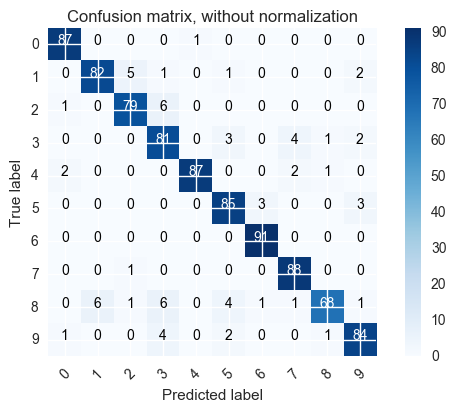

In [68]:
from sklearn.metrics import confusion_matrix
import itertools


class_names = digits.target_names

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, knn.predict(X_test))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.show()

### 11) Méthode pour le choix de k 




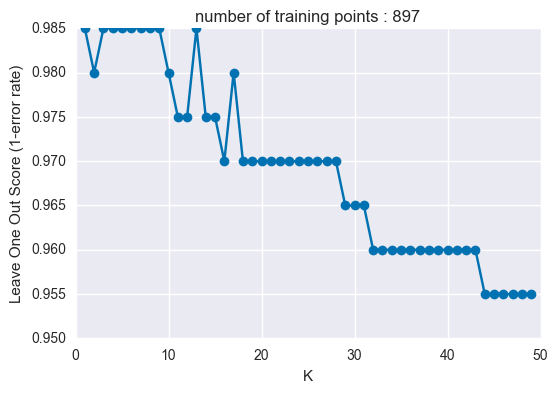

In [76]:
loo = source.LOOCurve(k_range=list(range(1,50)))
loo.fit_curve(X_train, Y_train)
loo.plot()

On peut choisir $ k = \{[3,9], 13\} $